# 1.0 Import necessary libraries



In [1]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 8.0 MB/s 


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_recall_fscore_support

# 2.0 Mount google drive and read images and labels

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
plant_images = np.load('/content/drive/My Drive/images.npy')

In [5]:
plant_labels = pd.read_csv('/content/drive/My Drive/Labels.csv')

In [6]:
# Convert Pandas Dataframe to Numpy array of labels
plant_labels_arr = plant_labels.to_numpy()

# 3.0 Size and shape of data

In [7]:
plant_labels.shape

(4750, 1)

In [8]:
plant_images.shape

(4750, 128, 128, 3)

## Observations


1.   There are 4750 images in the numpy array
2.   Each image is 128x128 pixles and has three color challens - R, G & B
3. There are 13 unique plant names 



# 4.0 Exploratory data analysis

## 4.1 Print sample images

In [9]:
# Let's find the unique plant names
unique_names = np.unique(plant_labels_arr)
print(unique_names)

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']



Sample images of each plant type

Black grass


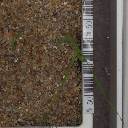

Charlock


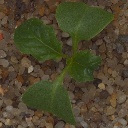

Cleavers


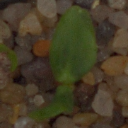

Common Chickweed


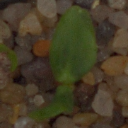

Common wheat


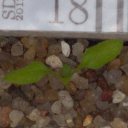

Fat Hen


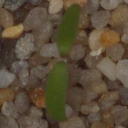

Loose Silky-bent


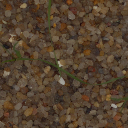

Maize


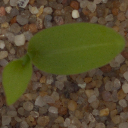

Scentless Mayweed


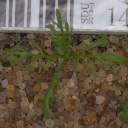

Shepherds Purse


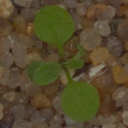

Small-flowered Cranesbill


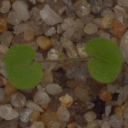

Sugar beet


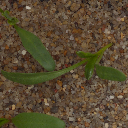

In [10]:
# Let's create the index of the plants in the given numpy array. 
index = plant_labels.index

print("\n\bSample images of each plant type\b\n")

blackgrass_index = index[plant_labels['Label'] == 'Black-grass']
blackgrass_list = plant_images[blackgrass_index]
print("Black grass")
cv2_imshow(blackgrass_list[0])

charlock_index = index[plant_labels['Label'] == 'Charlock']
charlock_list = plant_images[charlock_index]
print('Charlock')
cv2_imshow(charlock_list[0])

cleavers_index = index[plant_labels['Label'] == 'Cleavers']
cleavers_list = plant_images[cleavers_index]
print('Cleavers')
cv2_imshow(cleavers_list[0])

common_chickweed_index = index[plant_labels['Label'] == 'Common Chickweed']
common_chickweed_list = plant_images[common_chickweed_index]
print('Common Chickweed')
cv2_imshow(cleavers_list[0])

common_wheat_index = index[plant_labels['Label'] == 'Common wheat']
common_wheat_list = plant_images[common_chickweed_index]
print('Common wheat')
cv2_imshow(common_chickweed_list[0])

fat_hen_index = index[plant_labels['Label'] == 'Fat Hen']
fat_hen_list = plant_images[fat_hen_index]
print('Fat Hen')
cv2_imshow(fat_hen_list[0])

loose_silkybent_index = index[plant_labels['Label'] == 'Loose Silky-bent']
loose_silkyben_list = plant_images[loose_silkybent_index]
print('Loose Silky-bent')
cv2_imshow(loose_silkyben_list[0])

maize_index = index[plant_labels['Label'] == 'Maize']
maize_list = plant_images[maize_index]
print('Maize')
cv2_imshow(maize_list[0])

scentless_mayweed_index = index[plant_labels['Label'] == 'Scentless Mayweed']
scentless_mayweed_list = plant_images[scentless_mayweed_index]
print('Scentless Mayweed')
cv2_imshow(scentless_mayweed_list[0])

shepherds_purse_index = index[plant_labels['Label'] == 'Shepherds Purse']
shepherds_purse_list = plant_images[shepherds_purse_index]
print('Shepherds Purse')
cv2_imshow(shepherds_purse_list[0])

smallflowerd_cranesbill_index = index[plant_labels['Label'] == 'Small-flowered Cranesbill']
smallflowerd_cranesbill_list = plant_images[smallflowerd_cranesbill_index]
print('Small-flowered Cranesbill')
cv2_imshow(smallflowerd_cranesbill_list[0])

sugarbeet_index = index[plant_labels['Label'] == 'Sugar beet']
sugarbeet_list = plant_images[sugarbeet_index]
print('Sugar beet')
cv2_imshow(sugarbeet_list[0])

## 4.2 Print mean image of each plant type

In [11]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128, 3))
    plt.imshow(mean_img.astype('uint8'), vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()

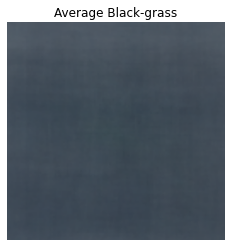

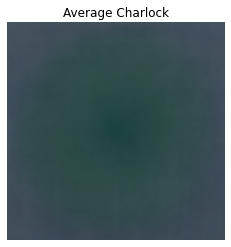

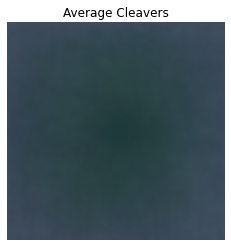

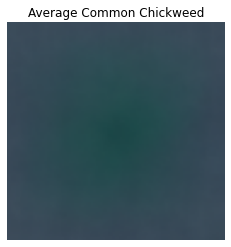

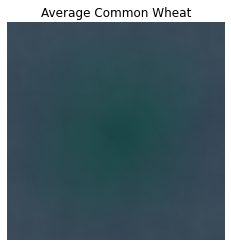

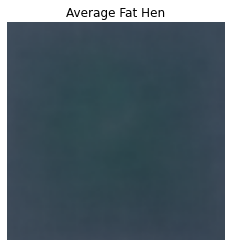

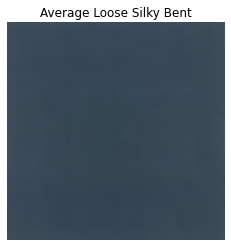

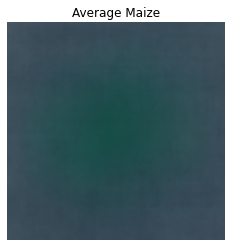

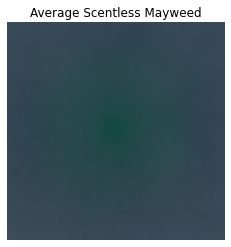

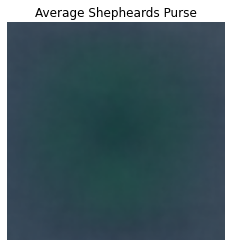

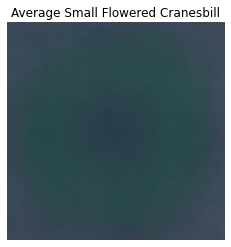

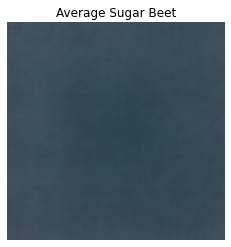

In [12]:
find_mean_img(blackgrass_list, "Black-grass")
find_mean_img(charlock_list, "Charlock")
find_mean_img(cleavers_list, "Cleavers")
find_mean_img(common_chickweed_list, "Common Chickweed")
find_mean_img(common_wheat_list, "Common Wheat")
find_mean_img(fat_hen_list, "Fat Hen")
find_mean_img(loose_silkyben_list, "Loose Silky Bent")
find_mean_img(maize_list, "Maize")
find_mean_img(scentless_mayweed_list, "Scentless Mayweed")
find_mean_img(shepherds_purse_list, "Shepheards Purse")
find_mean_img(smallflowerd_cranesbill_list, "Small Flowered Cranesbill")
find_mean_img(sugarbeet_list, "Sugar Beet")

## 4.3 Plot distribution of plant types

<Figure size 720x360 with 0 Axes>

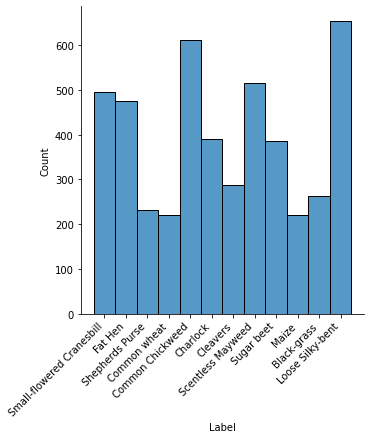

In [13]:
plt.figure(figsize=(10,5))

chart = sns.displot(
    data=plant_labels['Label'],
    x=plant_labels['Label']
)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

#### Observations 
1. There are 12 unique plant types
2. Loose Silky Bent has the most samples, Maize has the least 
3. The distribuion is fairly normal in nature - there is not a lot of imbalance

#5.0 Data Preprocessing

Sample Image before pre-processing


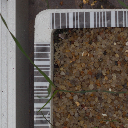

In [14]:
# Print a random image before pre-processing 
from random import randrange
rand = randrange(4749)
print("Sample Image before pre-processing")
cv2_imshow(plant_images[rand])

## 5.1 Gaussian blurring

In [15]:
# Gaussian Blurring to reduce noise
index = 0
for image in plant_images:
  plant_images[index] = cv2.GaussianBlur(image,(5,5),0)
  index = index + 1

Sample Image after pre-processing


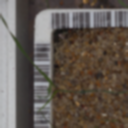

In [16]:
print("Sample Image after pre-processing")
cv2_imshow(plant_images[rand])

## 5.2 Normalization of pixels to reduce noise

In [17]:
# We perform a normalization to reduce the effect of illuminations differences
print("Data size of Pixel before normalization", plant_images.dtype)
print("Max pixel value before normalization", plant_images.max())
print("Min pixel value before normalization", plant_images.min())

Data size of Pixel before normalization uint8
Max pixel value before normalization 255
Min pixel value before normalization 0


In [18]:
# Let's do a normalization of pixels
plant_images = plant_images/255.0

In [19]:
print("Data size of Pixel after normalization", plant_images.dtype)
print("Max pixel value after normalization", plant_images.max())
print("Min pixel value after normalization", plant_images.min())

Data size of Pixel after normalization float64
Max pixel value after normalization 1.0
Min pixel value after normalization 0.0


## 5.3 Data Preparation

In [20]:
# Assign numerical values to plant name labels
categories_label = ['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse', 
              'Common wheat', 'Common Chickweed', 
              'Charlock', 'Cleavers', 'Scentless Mayweed', 
              'Sugar beet', 'Maize', 'Black-grass', 'Loose Silky-bent', ]

In [21]:
numerical_label = []

for label in plant_labels['Label']:
  if (label == 'Small-flowered Cranesbill'):
    numerical_label.append(0)
  elif (label == 'Fat Hen'):
    numerical_label.append(1)
  elif (label == 'Shepherds Purse'):
    numerical_label.append(2)
  elif (label == 'Common wheat'):
    numerical_label.append(3)
  elif (label == 'Common Chickweed'):
    numerical_label.append(4)
  elif (label == 'Charlock'):
    numerical_label.append(5)
  elif (label == 'Cleavers'):
    numerical_label.append(6)
  elif (label == 'Scentless Mayweed'):
    numerical_label.append(7)
  elif (label == 'Sugar beet'):
    numerical_label.append(8)
  elif (label == 'Maize'):
    numerical_label.append(9)
  elif (label == 'Black-grass'):
    numerical_label.append(10)
  elif (label == 'Fat Hen'):
    numerical_label.append(11)
  elif (label == 'Loose Silky-bent'):
    numerical_label.append(12)

## 5.4 Split Test & Train data

In [22]:
# Library to split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(plant_images, numerical_label, test_size=0.30, random_state = 1)

## 5.5 One Hot Encoding

In [23]:
# Let's use tensorflow one-hot encoding

encoded = to_categorical(y_train)
y_train_e=encoded
encoded_test = to_categorical(y_test)
y_test_e=encoded_test

In [24]:
print(y_test_e.shape)

(1425, 13)


In [25]:
print(y_train_e.shape)

(3325, 13)


# 6.0 CNN Modeling

## 6.1 Model 1

In [26]:
es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc1 = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model1 = Sequential()

In [27]:
y_train=np.array(y_train)
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model1.add(MaxPool2D(pool_size=(2,2)))


In [28]:
model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


In [29]:
model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


In [30]:
model1.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


In [31]:
model1.add(Flatten())
model1.add(Dense(128, activation = "relu"))
model1.add(Dropout(0.5))
model1.add(Dense(13, activation = "softmax"))
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 100  
batch_size = 64

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [32]:
es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc1 = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [33]:
history1=model1.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=20, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es1, mc1],use_multiprocessing=True)#number of samples per gradient update for training  

Epoch 1/20
42/42 [==============================] - 19s 35ms/step - loss: 3.1127 - accuracy: 0.1132 - val_loss: 2.3966 - val_accuracy: 0.1429

Epoch 00001: val_accuracy improved from -inf to 0.14286, saving model to best_model.h5
Epoch 2/20
42/42 [==============================] - 1s 22ms/step - loss: 2.4443 - accuracy: 0.1335 - val_loss: 2.3898 - val_accuracy: 0.1549

Epoch 00002: val_accuracy improved from 0.14286 to 0.15489, saving model to best_model.h5
Epoch 3/20
42/42 [==============================] - 1s 22ms/step - loss: 2.4374 - accuracy: 0.1263 - val_loss: 2.3796 - val_accuracy: 0.1549

Epoch 00003: val_accuracy did not improve from 0.15489
Epoch 4/20
42/42 [==============================] - 1s 22ms/step - loss: 2.4329 - accuracy: 0.1346 - val_loss: 2.3825 - val_accuracy: 0.1549

Epoch 00004: val_accuracy did not improve from 0.15489
Epoch 5/20
42/42 [==============================] - 1s 22ms/step - loss: 2.4335 - accuracy: 0.1278 - val_loss: 2.3823 - val_accuracy: 0.1549

Ep

In [34]:
model1.evaluate(X_test,np.array(y_test_e))

45/45 [==============================] - 0s 7ms/step - loss: 2.4251 - accuracy: 0.1326


[2.425077438354492, 0.1326315850019455]

### Observations

The accuracy of this model is about 13%. We need to think about a new architecure for the model. 
     
> Some of the ideas to improve are
*   New architecure with more convoution layers
*   Increasing the size of filters (from 64 to 128, 256 etc)
*   Tweak hyper parameters (Adam)
*   Adding dropouts


















## 6.2 Model 2

In [35]:
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc2 = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model2 = Sequential()

In [36]:
y_train=np.array(y_train)
# Increased filter size in the first layer
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

In [37]:
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

In [38]:
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

In [39]:
# Additional convulution layer
model2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

In [40]:
model2.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

In [41]:
model2.add(Flatten())
model2.add(Dense(1024, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(13, activation = "softmax"))
# Tweak Adam 
optimizer2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model2.compile(optimizer = optimizer2 , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [42]:
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc2 = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [43]:
history2=model2.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es2, mc2],use_multiprocessing=True)#number of samples per gradient update for training  

Epoch 1/30
42/42 [==============================] - 4s 65ms/step - loss: 2.4653 - accuracy: 0.1195 - val_loss: 2.4379 - val_accuracy: 0.1549

Epoch 00001: val_accuracy improved from -inf to 0.15489, saving model to best_model.h5
Epoch 2/30
42/42 [==============================] - 2s 43ms/step - loss: 2.4394 - accuracy: 0.1327 - val_loss: 2.4274 - val_accuracy: 0.1549

Epoch 00002: val_accuracy did not improve from 0.15489
Epoch 3/30
42/42 [==============================] - 2s 43ms/step - loss: 2.3320 - accuracy: 0.2008 - val_loss: 1.9444 - val_accuracy: 0.3714

Epoch 00003: val_accuracy improved from 0.15489 to 0.37143, saving model to best_model.h5
Epoch 4/30
42/42 [==============================] - 2s 43ms/step - loss: 1.8444 - accuracy: 0.3504 - val_loss: 1.7518 - val_accuracy: 0.4301

Epoch 00004: val_accuracy improved from 0.37143 to 0.43008, saving model to best_model.h5
Epoch 5/30
42/42 [==============================] - 2s 43ms/step - loss: 1.6483 - accuracy: 0.4169 - val_loss:

### 6.2.1 Model 2 Evaluation 

In [44]:
model2.evaluate(X_test,np.array(y_test_e))

45/45 [==============================] - 1s 11ms/step - loss: 0.7929 - accuracy: 0.7895


[0.7929195165634155, 0.7894737124443054]

### 6.2.2 Model 2 Observations 
*   Accuracy for the model has increased from 13% to 78%

### 6.3.3 Model 2 Plotting Train and Test accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


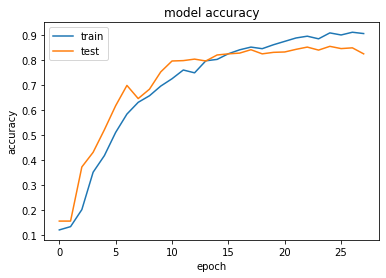

In [45]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# Test Prediction 
y_test_pred = model2.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_pred_prob = np.max(y_test_pred, axis=1)

In [47]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes)

0.7894736842105263

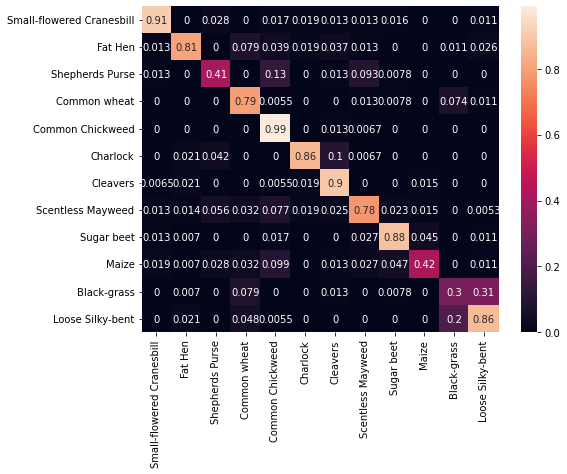

In [48]:
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=categories_label, yticklabels=categories_label, annot=True)

In [49]:
p=precision_recall_fscore_support(np.array(y_test), y_test_pred_classes, average=None,labels=list(np.unique(y_test)))

In [50]:
print(" Precision is {}\n\n Recall is {} \n\n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.92156863 0.89147287 0.725      0.74626866 0.71314741 0.91836735
 0.8        0.79591837 0.88976378 0.84848485 0.50909091 0.69361702]

 Recall is [0.90967742 0.80985915 0.4084507  0.79365079 0.98895028 0.85714286
 0.9        0.78       0.8828125  0.41791045 0.29787234 0.86243386] 

 f_beta Score is [0.91558442 0.84870849 0.52252252 0.76923077 0.8287037  0.88669951
 0.84705882 0.78787879 0.88627451 0.56       0.37583893 0.76886792]


### 6.4.4 Conclusion 



*   The precision ranges from 96% (for Small-flowered Cranesbill) to 65% (Loose Silky-bent 
*   The recall ranges from 94% (for Loose Silky-bent) to 65% (for Shepherds Purse)
*   The f1-score ranges from 92% for Small-flowered Cranesbill to less than 1% for Black Grass
*   It is clear from the metrics that certain plant types are easier to identify. Potential areas for improvement are to get better images with better gradients for plant types with low f1-score

